<a href="https://colab.research.google.com/github/anshudaur/TensorFlowProjects/blob/master/CVDL_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.0.0


In [0]:
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
# data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
#                                          fname='flower_photos', untar=True)
# # print(data_dir)
# data_dir = pathlib.Path(data_dir)
# print(data_dir)

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/CVDL_Project/dataset/'  #change dir to your project folder

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [33]:
data_dir=pathlib.Path(root_path+'train')
valid_dir=pathlib.Path(root_path+'valid')
test_dir=pathlib.Path(root_path+'test')
print(data_dir,',',valid_dir,',',test_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
valid_image_count = len(list(valid_dir.glob('*/*.jpg')))
print(valid_image_count)

gdrive/My Drive/CVDL_Project/dataset/train , gdrive/My Drive/CVDL_Project/dataset/valid , gdrive/My Drive/CVDL_Project/dataset/test
4918
1638


In [7]:
import numpy as np
BATCH_SIZE = 64
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
print(CLASS_NAMES)

['98' '99' '93' '97' '96' '94' '90' '95' '92' '91' '9' '89' '85' '82' '83'
 '84' '88' '86' '87' '81' '8' '80' '79' '78' '71' '72' '75' '74' '76' '73'
 '70' '77' '69' '7' '67' '68' '62' '61' '64' '63' '65' '60' '66' '6' '59'
 '58' '57' '56' '51' '49' '53' '54' '55' '52' '5' '50' '47' '48' '45' '40'
 '44' '41' '4' '43' '42' '46' '39' '38' '37' '36' '34' '31' '3' '35' '29'
 '32' '30' '33' '28' '27' '26' '25' '22' '18' '23' '21' '20' '24' '2' '19'
 '16' '17' '14' '15' '12' '11' '100' '102' '101' '1' '13' '10']


In [74]:
 image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
 train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                      #batch_size=BATCH_SIZE,
                                                      shuffle=True,
                                                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                      classes = list(CLASS_NAMES),class_mode='categorical')
valid_data_gen = image_generator.flow_from_directory(directory=str(valid_dir),
                                                      #batch_size=BATCH_SIZE,
                                                      shuffle=True,
                                                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                      classes = list(CLASS_NAMES),class_mode='categorical')
test_data_gen = image_generator.flow_from_directory(directory=str(test_dir),
                                                      #batch_size=BATCH_SIZE,
                                                      shuffle=True,
                                                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                      classes = list(CLASS_NAMES),class_mode='categorical')

Found 4918 images belonging to 102 classes.
Found 1638 images belonging to 102 classes.
Found 1638 images belonging to 102 classes.


In [0]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

In [0]:
# image_batch, label_batch = next(train_data_gen)
# show_batch(image_batch, label_batch)

In [69]:
train_list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))
test_list_ds = tf.data.Dataset.list_files(str(test_dir/'*/*'))
valid_list_ds = tf.data.Dataset.list_files(str(valid_dir/'*/*'))

print(type(train_list_ds))

<class 'tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter'>


In [0]:
     
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  return tf.dtypes.cast(parts[-2] == CLASS_NAMES , tf.int16)
  #one_hot_list = one_hot_encode(parts[-2], 102)
  '''if parts[-2] == CLASS_NAMES:
    label=tf.dtypes.cast(parts[-2],tf.int16)
  return tf.one_hot(label,depth=102)'''


In [0]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

In [0]:
def process_path(file_path):
  label = get_label(file_path)
  print(label)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [14]:
import os
AUTOTUNE = tf.data.experimental.AUTOTUNE
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_labeled_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
print(train_labeled_ds)
test_labeled_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
print(test_labeled_ds)
valid_labeled_ds = valid_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
print(valid_labeled_ds)

Tensor("Cast:0", shape=(102,), dtype=int16)
<DatasetV1Adapter shapes: ((224, 224, 3), (102,)), types: (tf.float32, tf.int16)>
Tensor("Cast:0", shape=(102,), dtype=int16)
<DatasetV1Adapter shapes: ((224, 224, 3), (102,)), types: (tf.float32, tf.int16)>
Tensor("Cast:0", shape=(102,), dtype=int16)
<DatasetV1Adapter shapes: ((224, 224, 3), (102,)), types: (tf.float32, tf.int16)>


In [16]:
for image, label in train_labeled_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label)

Image shape:  (224, 224, 3)
Label:  tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(102,), dtype=int16)


In [0]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=6000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(BATCH_SIZE)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

In [0]:
train_ds = prepare_for_training(train_labeled_ds)

#image_batch, label_batch = next(iter(train_ds))


In [0]:
valid_img_batch, valid_label_batch = next(iter(valid_labeled_ds))

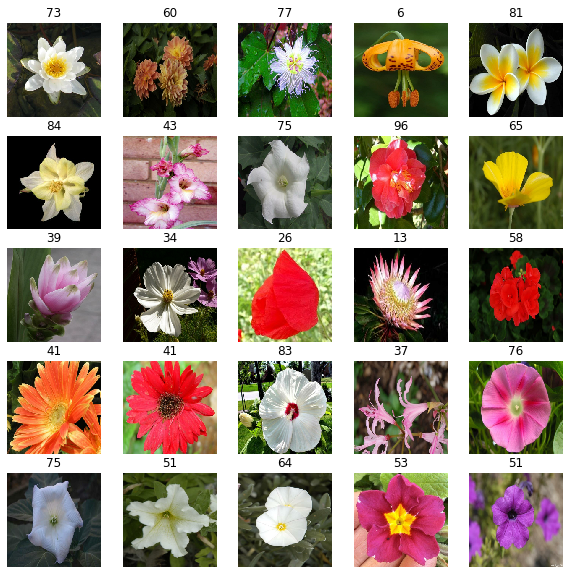

In [55]:
show_batch(image_batch.numpy(), label_batch.numpy())

In [82]:
from tensorflow.keras import datasets, layers, models
'''layer_list = [layers.Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)),
              layers.Conv2D(128, (3, 3), activation='relu'),
              layers.Conv2D(256, (3, 3), activation='relu'),
              layers.Conv2D(256, (3, 3), activation='relu'),
              layers.Flatten(),layers.Dense(102)]'''

layer_list = [layers.Conv2D(32, (4, 4), activation='relu', input_shape=(224, 224, 3)),
              layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),
              layers.Conv2D(64, (4, 4), activation='relu'),
              layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),
              layers.Conv2D(128, (4, 4), activation='relu'),
              layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),
              layers.Conv2D(256, (4, 4), activation='relu'),
              layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),
              layers.Conv2D(128, (4, 4), activation='relu'),
              layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),
              layers.Flatten(),layers.Dense(256,activation='softmax'),
              layers.Dropout(0.25),layers.Dense(102)]

vgg_layer_list = [layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
              layers.Conv2D(64, (3,3), activation='relu'),
              layers.MaxPooling2D(),
              layers.Conv2D(128, (3,3), activation='relu'),
              layers.Conv2D(128, (3,3), activation='relu'),
              layers.MaxPooling2D(),
              layers.Conv2D(256, (3,3), activation='relu'),
              layers.Conv2D(256, (3,3), activation='relu'),
              layers.Conv2D(256, (3,3), activation='relu'),
              layers.Conv2D(256, (3,3), activation='relu'),
              layers.MaxPooling2D(),
              layers.Conv2D(512, (3,3), activation='relu'),
              layers.Conv2D(512, (3,3), activation='relu'),
              layers.Conv2D(512, (3,3), activation='relu'),
              layers.Conv2D(512, (3,3), activation='relu'),
              layers.MaxPooling2D(),
              layers.Conv2D(512, (3,3), activation='relu'),
              layers.Conv2D(512, (3,3), activation='relu'),
              layers.Conv2D(512, (3,3), activation='relu'),
              layers.Conv2D(512, (3,3), activation='relu'),
              layers.MaxPooling2D(),
              layers.Flatten(),layers.Dense(4096),layers.Dense(4096),
              layers.Dense(102,activation='softmax')]

model = tf.keras.Sequential(vgg_layer_list)

#learning_rate=1e-4

opt = tf.keras.optimizers.Adam()
# from_logits = True!! #neverforget
#loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)


ValueError: ignored

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#print(train_img_batch.shape,train_label_batch.shape)

In [79]:
import time

start = time.time()
model.fit_generator(train_data_gen,
                    epochs=100,
                    validation_data=valid_data_gen)

#model.fit(image_batch,label_batch, steps_per_epoch=STEPS_PER_EPOCH, epochs=10,batch_size=BATCH_SIZE)
end = time.time()
print('Processing time:',(end - start)/60)
model.save_weights(root_path+'cnn_model_img_generator_vgg.h5')

Epoch 1/10
77/77 [==============================] - 45s 591ms/step - loss: 7.3047 - accuracy: 0.0136 - val_loss: 8.9849 - val_accuracy: 0.0079
Epoch 2/10
77/77 [==============================] - 42s 539ms/step - loss: 8.5509 - accuracy: 0.0106 - val_loss: 7.5744 - val_accuracy: 0.0079
Epoch 3/10
77/77 [==============================] - 42s 550ms/step - loss: 8.3626 - accuracy: 0.0104 - val_loss: 8.6217 - val_accuracy: 0.0079
Epoch 4/10
77/77 [==============================] - 40s 520ms/step - loss: 8.0647 - accuracy: 0.0096 - val_loss: 7.5742 - val_accuracy: 0.0079
Epoch 5/10
77/77 [==============================] - 40s 519ms/step - loss: 7.9619 - accuracy: 0.0096 - val_loss: 8.5439 - val_accuracy: 0.0079
Epoch 6/10
77/77 [==============================] - 40s 518ms/step - loss: 8.0397 - accuracy: 0.0110 - val_loss: 7.5742 - val_accuracy: 0.0079
Epoch 7/10
77/77 [==============================] - 40s 516ms/step - loss: 8.1762 - accuracy: 0.0075 - val_loss: 8.5372 - val_accuracy: 0.0079